# Лабораторная работа 1. Введение в PyTorch

### Содержание
1. [Установка](#Установка)
1. [Тензоры](#Тензоры)
1. [Автоматическое дифференцирование](#Автоматическое-дифференцирование)
1. [Линейная регрессия в PyTorch](#Линейная-регрессия-в-PyTorch)
1. [Линейная классификация в PyTorch](#Линейная-классификация-в-PyTorch)

### Установка
Чтобы установить PyTorch, нужно на [официальном сайте](https://pytorch.org/get-started/locally/) сгенерировать команду для установки в зависимости от версии операционной системы и других параметров.  
Рекомендуется также установить [CUDA](https://developer.nvidia.com/cuda-zone) (Compute Unified Device Architecture) – вычислительную платформу от Nvidia для поддержки вычислений на видеокартах и [CuDNN](https://developer.nvidia.com/cudnn) (CUDA Deep Neural Network) – библиотеку на основе CUDA для поддержки глубоких нейронных сетей.  
Проверить правильность установки и узнать версии используемого ПО можно следующим образом:

In [1]:
import torch
import sys
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Утилита от Nvidia для вывода информации о видеокарте
!nvidia-smi

Sun Apr 18 02:10:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 466.11       Driver Version: 466.11       CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   37C    P8    N/A /  N/A |     76MiB /  3072MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
print('Python VERSION:', sys.version)
print('\npyTorch VERSION:', torch.__version__)
print('\nCUDA VERSION:')
! nvcc --version
print('\nCUDNN VERSION:', torch.backends.cudnn.version())
print('\nNumber CUDA Devices:', torch.cuda.device_count())
print('Current cuda device:', torch.cuda.current_device())
print('Cuda device name: ', torch.cuda.get_device_name(0))

Python VERSION: 3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]

pyTorch VERSION: 1.8.1

CUDA VERSION:
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:32:27_Pacific_Daylight_Time_2019
Cuda compilation tools, release 10.2, V10.2.89

CUDNN VERSION: 7605

Number CUDA Devices: 1
Current cuda device: 0
Cuda device name:  NVIDIA GeForce GTX 1050


---
Проверить доступность CUDA можно также следующим образом:

In [4]:
torch.cuda.is_available()

True

### Тензоры
*Тензор* – многомерный массив данных в библиотеках глубокого обучения. Тензор может быть 0-мерным (скаляр), одномерным (вектор), двумерным (матрица) или размерностью больше двух.  
Тензоры используются для представления входов, выходов и параметров моделей.

#### Инициализация тензоров
Тензоры могут быть инициализированы несколькими способами.

1. На основе данных:

In [5]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

2. Из массивов NumPy:

In [6]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

3. Заполненные случайным образом или константными значениями:

In [7]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f'Random Tensor: \n {rand_tensor} \n')
print(f'Ones Tensor: \n {ones_tensor} \n')
print(f'Zeros Tensor: \n {zeros_tensor}')

Random Tensor: 
 tensor([[0.9118, 0.9506, 0.8562],
        [0.9342, 0.9395, 0.1310]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### Атрибуты тензоров
Тензоры имеют несколько атрибутов, в том числе:

In [14]:
tensor = torch.rand(3, 4)
print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored on the following device: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on the following device: cpu


#### Операции над тензорами
По умолчанию тензоры создаются на CPU.  
Чтобы переместить их на GPU нужно вызвать метод `to`:

In [15]:
print(f'Tensor is stored on: {tensor.device}')
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
print(f'Tensor is stored on: {tensor.device}')

Tensor is stored on: cpu
Tensor is stored on: cuda:0


---
Индексирование и срезы (slicing):

In [10]:
tensor = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(f'Initial tensor:\n{tensor}\n')
print(f'First row: {tensor[0]}\n')
print(f'First column: {tensor[:, 0]}\n')
print(f'Last column: {tensor[..., -1]}\n')
tensor[:,1] = 0
print(tensor)

Initial tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

First row: tensor([1, 2, 3, 4])

First column: tensor([1, 5, 9])

Last column: tensor([ 4,  8, 12])

tensor([[ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12]])


---
Конкатенация:

In [12]:
concat_tensor = torch.cat([tensor, tensor, tensor], dim=1)
print(concat_tensor)

tensor([[ 1,  0,  3,  4,  1,  0,  3,  4,  1,  0,  3,  4],
        [ 5,  0,  7,  8,  5,  0,  7,  8,  5,  0,  7,  8],
        [ 9,  0, 11, 12,  9,  0, 11, 12,  9,  0, 11, 12]])


---
Арифметические операции:

In [11]:
shape = (3, 3)
tensor1 = torch.ones(shape)
tensor2 = torch.ones(shape)
tensor_sum = tensor1 + tensor2
print(f'tensor1 + tensor2 = \n{tensor_sum}\n')
tensor_mul1 = tensor1 @ tensor2
print(f'tensor1 @ tensor2 = \n{tensor_mul1}\n')
tensor_mul2 = torch.matmul(tensor1, tensor2)
print(f'torch.matmul(tensor1, tensor2) = \n{tensor_mul2}\n')
tensor_mul3 = tensor1 * tensor2
print(f'tensor1 * tensor2 = \n{tensor_mul3}\n')

tensor1 + tensor2 = 
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

tensor1 @ tensor2 = 
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

torch.matmul(tensor1, tensor2) = 
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

tensor1 * tensor2 = 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])



---
Тензор может состоять из одного элемента (скаляр). В этом случае для доступа к значению тензора можно воспользоваться методом `item`:

In [12]:
summa = tensor.sum()
print(f'summa = {summa}, type(summa): {type(summa)}\n')
print(f'summa.item() = {summa.item()}, type(summa.item()): {type(summa.item())}')

summa = 60, type(summa): <class 'torch.Tensor'>

summa.item() = 60, type(summa.item()): <class 'int'>


---
Операции `in-place` – это операции, результат которых сохраняется в самом операнде. Обозначаются суфиксом `_`:

In [13]:
print(f'{tensor}\n')
tensor.add_(5)
print(tensor)

tensor([[ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12]])

tensor([[ 6,  5,  8,  9],
        [10,  5, 12, 13],
        [14,  5, 16, 17]])


### Автоматическое дифференцирование

Для настройки весов в нейронных сетях используется *алгоритм обратного распространения ошибки* (back propagation). В этом алгоритме веса изменяются в зависимости от градиента функции ошибки.  
В PyTorch модуль `torch.autograd` отвечает за автоматическое дифференцирование на вычислительном графе.  

Рассмотрим сигмоидальную функцию и её производную:
$$\sigma(u)=\frac{1}{1+e^{-u}}$$
  
$$\sigma'(u)=\frac{e^{-u}}{(1+e^{-u})^2}=\frac{1}{(1+e^{-u})}\frac{e^{-u}}{(1+e^{-u})}=\frac{1}{(1+e^{-u})}\frac{(1+e^{-u})-1}{(1+e^{-u})}=\sigma(u)(1-\sigma(u))$$

Зададим эти функции в PyTorch и нарисуем их графики:

In [4]:
def sigmoid(u):
    return 1 / (1 + torch.exp(-u))

In [5]:
def sigmoid_deriv(u):
    return sigmoid(u) * (1 - sigmoid(u))

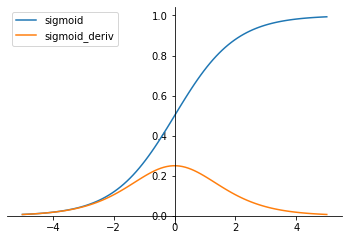

In [6]:
import matplotlib.pyplot as plt
x = torch.tensor(np.linspace(-5, 5, 100))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, sigmoid_deriv(x), label='sigmoid_deriv')
ax.legend()
plt.show()

Зададим тензор, для которого мы хотели бы найти градиент (параметр `requires_grad=True`):

In [17]:
u = torch.tensor(0.0, requires_grad=True)
u

tensor(0., requires_grad=True)

Зададим тензор, которому присвоим значение функции 

In [18]:
s = sigmoid(u)
s

tensor(0.5000, grad_fn=<MulBackward0>)

В атрибуте `grad_fn` хранится ссылка на функцию, которая была использована для вычисления тензора.  
В случае задания тензора пользователем – `grad_fn = None`:

In [19]:
print(f'u.grad_fn: {u.grad_fn}\n')
print(f's.grad_fn: {s.grad_fn}\n')
a = u + u
print(f'(u+u).grad_fn: {a.grad_fn}\n')
a = u - u
print(f'(u-u).grad_fn: {a.grad_fn}\n')
a = u * u
print(f'(u*u).grad_fn: {a.grad_fn}\n')
a = u / u
print(f'(u/u).grad_fn: {a.grad_fn}\n')
a = 1 / u
print(f'(1/u).grad_fn: {a.grad_fn}\n')
a = torch.mean(u)
print(f'mean(u).grad_fn: {a.grad_fn}')

u.grad_fn: None

s.grad_fn: <MulBackward0 object at 0x00000284F15C8248>

(u+u).grad_fn: <AddBackward0 object at 0x00000284F15C8248>

(u-u).grad_fn: <SubBackward0 object at 0x00000284F15C8248>

(u*u).grad_fn: <MulBackward0 object at 0x00000284AB397A88>

(u/u).grad_fn: <DivBackward0 object at 0x00000284AB397A88>

(1/u).grad_fn: <MulBackward0 object at 0x00000284AB397A88>

mean(u).grad_fn: <MeanBackward0 object at 0x00000284AB397A88>


---
Для вычисления градиента необходимо вызвать метод `backward`:

In [20]:
s.backward()

Значение градиента после вызова `backward` хранится в атрибуте `grad`:

In [21]:
u.grad

tensor(0.2500)

Проверим, что значение градиента (производной) совпадает со значением, вычисленным аналитически:

In [22]:
sigmoid_deriv(u)

tensor(0.2500, grad_fn=<MulBackward0>)

Обратите внимание, что повторный вызов метода `backward` невозможен:

In [ ]:
# Раскомментируйте эту строку
#s.backward()

Для того, чтобы повторно вызывать метод `backward`, следует указать при его вызове параметр `retain_graph=True`. Но имейте в виду, что в этом случае значение градиента будет накапливаться:

In [23]:
a = torch.tensor(1.0, requires_grad=True)
b = a * a
b.backward(retain_graph=True)
print(f'a.grad = {a.grad}')
b.backward(retain_graph=True)
print(f'a.grad = {a.grad}')
b.backward()
print(f'a.grad = {a.grad}')

a.grad = 2.0
a.grad = 4.0
a.grad = 6.0


При необходимости градиенты можно обнулить:

In [24]:
u.grad.data.zero_()
u.grad

tensor(0.)

**Задание**. Проверьте значения производной сигмоидальной функции, вычисленные в разных точках. Сравните их со значениями на графике функций.

In [84]:
ten = torch.tensor(1.0, requires_grad=True)
out = sigmoid(ten)
out.backward(retain_graph=True)
print(ten.grad)
print(sigmoid_deriv(ten))

tensor(0.1966)
tensor(0.1966, grad_fn=<MulBackward0>)


---
Отметим, что в PyTorch, конечно, имеется [своя реализация](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) сигмоидальной функции.

**Задание**. Посчитайте значения градиента при помощи сигмоидальной функции из PyTorch.

*Замечание*. Мы можем найти градиенты только для листьев в графе вычислений.

In [79]:
input = torch.tensor(10.0, requires_grad=True)
m = nn.sigmoid()
output = m(input)
output.backward()
input.grad

tensor(4.5417e-05)

#### Приостановка отслеживания градиентов
По умолчанию, PyTorch отслеживает историю вычислений и поддерживает вычисление градиентов для тензоров, у которых установлено `requires_grad=True`.  
Однако иногда бывает необходимо приостановить отслеживание, например, когда сеть уже обучена и требуется выполнять только прямой проход или когда в процессе обучения сети нужно зафиксировать веса определенных слоев. В этом случае можно воспользоваться блоком `no_grad` или методом `detach()`:

In [85]:
s = sigmoid(u)
print(f's.requires_grad = {s.requires_grad}')

with torch.no_grad():
    s = sigmoid(u)
print(f's.requires_grad = {s.requires_grad}')

s.requires_grad = True
s.requires_grad = False


In [86]:
s = sigmoid(u)
print(f's.requires_grad = {s.requires_grad}')

s = s.detach()
print(f's.requires_grad = {s.requires_grad}')

s.requires_grad = True
s.requires_grad = False


### Линейная регрессия в PyTorch

#### Создание модели
Построим однослойную сеть, состоящую из одного нейрона, которая аналогична обычной линейной регрессии.

Пространство имен `nn` в PyTorch предоставляет все необходимые блоки для построения нейронных сетей.  
Каждый модуль наследует классу [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). Нейронная сеть представляет собой также модуль, который содержит другие модули (слои).

In [22]:
from torch import nn

Определим устройство, на котором будем обучать сеть:

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using "{}" device'.format(device))

Using "cuda" device


Опишем класс нашей нейронной сети (который должен являться наследником `nn.Module`):

In [18]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.regr = nn.Linear(1, 1)

    def forward(self, x):
        y = self.regr(x)
        return y

Метод `__init__` является конструктором класса.  
В первой строке конструктора вызывается конструктор базового класса `nn.Module`.  
Во второй строке создается единственный слой, содержащий один нейрон, с помощью модуля [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).  
Данный модуль осуществляет линейное преобразование входа $\vec{x}$ в выход $\vec{y}$ с учетом матрицы весов $W$:  

$$\vec{y}=\vec{x}W^T+\vec{b}.$$

Первый аргумент для `Linear` – `in_features` – количество входов $x$, второй `out_features` – количество выходов $y$ (фактически, количество нейронов в данном слое). Существует также третий аргумент – `bias`, определяющий наличие вектора свободных коэффициентов $\vec{b}$ (по умолчанию `bias=True`).  
Матрица весов $W$ будет иметь размерность (`out_features`, `in_features`), вектор свободных коэффициентов $\vec{b}$ – (`out_features`).  
Значения $W$ и $\vec{b}$ инициализируются случайным образом из равномерного распределения $U(-\sqrt{k},\sqrt{k})$, где $k=\frac{1}{in\_features}$.

Заметим, что атрибут `requires_grad` для тензоров-весов сети автоматически устанавливается в `True`.

Метод `forward` определяет поток данных через нашу сеть (*прямой проход*). Аргумент `x` – это входные данные для сети. В нашем примере к `x` применяется линейное преобразование, результат которого является выходом сети (линейная регрессия).

---
Инициализируем генератор случайных чисел PyTorch для воспроизводимости результатов (для одинаковых начальных значений весов):

In [19]:
torch.manual_seed(42)

Создаем экземпляр класса `NeuralNetwork` и выводим структуру сети:

In [20]:
model = NeuralNetwork()
model

NeuralNetwork(
  (regr): Linear(in_features=1, out_features=1, bias=True)
)

---
Перемещаем сеть на GPU:

In [24]:
model.to(device)

NeuralNetwork(
  (regr): Linear(in_features=1, out_features=1, bias=True)
)

---
Вывод значений весов:

In [39]:
def print_weights(model):
    
    for parameter in model.named_parameters():
        print(f'{parameter[0]} = {parameter[1].data}')

In [26]:
print_weights(model)

regr.weight = tensor([[0.7645]], device='cuda:0')
regr.bias = tensor([0.8300], device='cuda:0')


#### Генерация набора данных

Инициализируем генератор случайных чисел `numpy` для воспроизводимости результатов:

In [27]:
np.random.seed(42)

Генерируем случайные данные:  
- $X$ – из равномерного распределения от 1 до 10,
- $y=2x+1$ с учетом нормально распределенного шума.

In [28]:
n_samples = 100
data = np.random.uniform(1, 10, (n_samples, 1)).astype(np.float32)
targets = 2 * data + 1 + np.random.normal(0, 2, (n_samples, 1)).astype(np.float32)

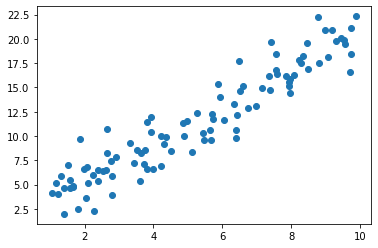

In [29]:
plt.scatter(data, targets)
plt.show()

Создаем тензоры PyTorch:

In [30]:
data = torch.from_numpy(data)
targets = torch.from_numpy(targets)

Перемещаем тензоры на GPU:

In [31]:
data = data.to(device)
targets = targets.to(device)

Нарисуем предсказание модели со случайно инициализированными весами:

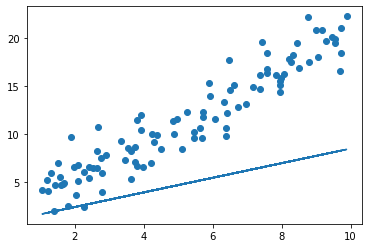

In [32]:
predictions = model(data)
plt.scatter(data.cpu().numpy(), targets.cpu().numpy())
plt.plot(data.cpu().detach().numpy(), predictions.cpu().detach().numpy())
plt.show()

#### Обучение сети
Сначала задаем функцию потерь ([MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)):

In [33]:
loss_fn = nn.MSELoss()

Затем определим оптимизатор:

In [34]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Зададим функцию, определяющую действия в процессе одной эпохи обучения:

In [35]:
def train_loop(data, targets, model, loss_fn, optimizer):   
    for i in range(len(data)):
        # Вычисляем предсказание модели на одном объекте
        pred = model(data[i])
        
        # Вычисляем функцию потерь
        print(pred)
        loss = loss_fn(pred, targets[i])
       
        # Backpropagation
        optimizer.zero_grad()    
        loss.backward()
        optimizer.step()
        
        #if i % 10 == 0:
           # print(f'loss: {loss}')   

Запускаем цикл обучения:

In [36]:
epochs = 10
print_weights(model)
for t in range(epochs):
    print(f'-------------------------------\nEpoch {t+1}')
    train_loop(data, targets, model, loss_fn, optimizer)
    print()
    print_weights(model)

regr.weight = tensor([[0.7645]], device='cuda:0')
regr.bias = tensor([0.8300], device='cuda:0')
-------------------------------
Epoch 1
tensor([4.1717], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0498], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.0618], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3957], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4892], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6082], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4441], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2174], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6397], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1389], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2744], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6814], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7180], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0666], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9050], device='cuda:0', grad_fn=<A

tensor([17.4167], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6801], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4773], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0011], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5031], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4302], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3450], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9578], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7844], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6183], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9726], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6833], device='cuda:0', grad_fn=<AddBackward0>)
tensor([22.9077], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0770], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7826], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5706], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4945], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([19.3018], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9031], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2057], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6162], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2379], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.1058], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9160], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1029], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1511], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9395], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2896], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8612], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8668], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9272], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7635], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8962], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2169], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([6.1401], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5439], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6568], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2385], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8588], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7504], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8545], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5924], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8056], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0708], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.4129], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7606], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9205], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3106], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0014], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5418], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5906], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([17.6600], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1679], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6559], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1348], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0278], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3398], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9304], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2502], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6301], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2458], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0599], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9294], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0838], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1838], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9818], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2704], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8602], device='cuda:0', grad_fn=<AddBackward0>)
tenso

---
Нарисуем получившуюся модель:

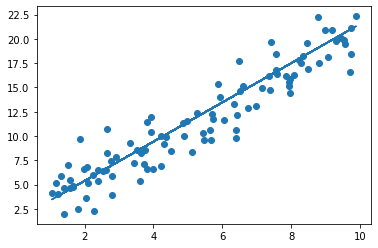

In [37]:
predictions = model(data)
plt.scatter(data.cpu().numpy(), targets.cpu().numpy())
plt.plot(data.cpu().detach().numpy(), predictions.cpu().detach().numpy())

**Задание**. Вычислите MSE для итоговой модели.

In [38]:
Loss_Fn = nn.MSELoss()
pred = model(data)
loss = Loss_Fn(pred, targets)
loss.backward()
print(f'loss: {loss}')

loss: 3.5339627265930176


**Задание**. Выполните перебор гиперпараметров – скорости обучения и количества эпох (не менее пяти значений на каждый гиперпараметр) и найдите комбинацию, при которой достигается минимум MSE на обучающих данных.

In [41]:
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
epochs = [5, 10, 15, 20, 25, 30, 35]
MSE = 10000
Loss_Fn = nn.MSELoss()
results = {'learning_rate':0, 'epoch':0, 'MSE':0}
for learning_rate in learning_rates:
    for epoch in epochs:        
        Model = NeuralNetwork().to(device)      
        optimizer = torch.optim.SGD(Model.parameters(), lr=learning_rate)
        for ep in range(0, epoch):
            train_loop(data, targets, Model, loss_fn, optimizer)
        pred = Model(data)       
        fullLoss = loss_fn(pred, targets)
        if fullLoss <= MSE:
            MSE = fullLoss
            results['learning_rate'] = learning_rate
            results['epoch'] = epoch
            results['MSE'] = fullLoss

tensor([-2.5320], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-6.4988], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-4.9528], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-4.0186], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.9955], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.9944], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.3278], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-5.8189], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.9908], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-4.6980], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.0606], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-6.4332], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-5.4643], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.3199], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.1160], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.1253], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.9234], device='cuda:0', grad_fn=<AddBackward0

tensor([-2.0827], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.3226], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0176], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.4464], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.3478], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.5228], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.1882], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.7554], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.4111], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.1978], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.9209], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1973], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.6233], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.3860], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-2.0983], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.4749], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0695], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([3.5660], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1277], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.6536], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.0410], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7858], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0690], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1203], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2397], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.8591], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4905], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.5451], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7746], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7136], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3542], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4407], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.3346], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7565], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1799

tensor([1.2149], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6032], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8472], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3176], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1441], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1538], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8467], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1113], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5840], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7792], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6215], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.9115], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7908], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2199], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7394], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6408], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2676], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0887

tensor([1.9553], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1836], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2843], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1418], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2787], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9850], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.8810], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8295], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9423], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1316], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4179], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3972], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1291], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3365], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.0463], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4383], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8608], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5360

tensor([9.0289], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4831], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4685], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2135], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0314], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3628], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2141], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2110], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6215], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7982], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3088], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5071], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5307], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1383], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8101], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7677], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3403], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.92

tensor([2.8358], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7941], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2331], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.8853], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1660], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3681], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6099], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4325], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3644], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4825], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1155], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5384], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.8630], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.9131], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1877], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3480], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8317], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.0695

tensor([2.5016], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0842], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0614], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5740], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2646], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.6753], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9503], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.2498], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1650], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7975], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0677], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.8078], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0920], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3987], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5559], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8467], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.2673], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1410

tensor([8.8998], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2875], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7862], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7509], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5608], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7947], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6568], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4790], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8029], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.2464], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8758], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2921], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.1331], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.8383], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7816], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.4591], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9179], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4770

tensor([3.1785], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1956], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4600], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7672], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7994], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3284], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6852], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7424], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3423], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1213], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0633], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5155], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3792], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6816], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5051], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7732], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6695], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0806

tensor([1.7788], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7666], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9609], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.8657], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2550], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6620], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3503], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3503], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1753], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8774], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7017], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9901], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7283], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.1448], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.5050], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0419], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6749], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3

tensor([11.7862], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2424], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7001], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3586], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9368], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.2345], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7981], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6076], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3590], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1601], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0177], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8651], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0064], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4741], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7438], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9318], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.2789], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([2.0122], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.1380], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3873], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8951], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5077], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8091], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7767], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1572], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1426], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.7612], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3297], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9137], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8387], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9576], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6325], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9360], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3472], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.6515

tensor([9.2066], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7782], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2379], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1009], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.0958], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2733], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4656], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.3035], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0474], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.2486], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5214], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9603], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.6722], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1641], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4679], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.9461], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0815], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.97

tensor([11.3122], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4805], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0955], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1160], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6453], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4357], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2641], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4847], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5437], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5660], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5001], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4415], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5798], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7521], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3337], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3240], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3181], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.39

tensor([1.8391], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2743], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4719], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0897], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8191], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.2923], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5308], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6260], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8895], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.5616], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7868], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7121], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8512], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2562], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.9308], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.3212], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4723], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6

tensor([4.0736], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1814], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3069], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6872], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0241], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6632], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2122], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4774], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8402], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0477], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4607], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0739], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0593], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7755], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9890], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0658], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6896], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([6.0179], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7497], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0173], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1632], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1370], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0352], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7519], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5829], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3026], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6903], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1416], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4404], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8620], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1373], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.5622], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4866], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0930], device='cuda:0', grad_fn=<AddBackward0>)
tensor([

tensor([7.0586], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1332], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.2276], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.3545], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6207], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2895], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2985], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5287], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.5976], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.6466], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.9229], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2034], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.8369], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6164], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.3797], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7862], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([0.6156], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5947], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2419], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.6711], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.4038], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.2606], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.4604], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.0863], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0028], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.1521], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.6051], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.0206], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.1233], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2441], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.3119], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.6220], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.4002], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([2.1786], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7764], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1598], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5760], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.4951], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1719], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.5031], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.9044], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3711], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.7740], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1802], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5357], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0940], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6134], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.6566], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1818], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1692], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2742

tensor([4.9141], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1612], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7171], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2595], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.8983], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7993], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5108], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9117], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6673], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.2600], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1083], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9396], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3084], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4545], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7232], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5308], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2473], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.7849

tensor([1.1854], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0511], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0331], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.3928], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4953], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.6653], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9448], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5407], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9116], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9880], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7324], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9585], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.9347], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5111], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8975], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2912], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9360], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4451

tensor([6.9782], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0890], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6719], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4428], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3751], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7914], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7200], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9883], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8038], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1311], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.9672], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4255], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.3276], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5341], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7261], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0952], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8398], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.67

tensor([1.1647], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1573], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3667], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3046], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6822], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0821], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7445], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7446], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.5639], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.3146], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1236], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4191], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1149], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5910], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9435], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4412], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0724], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.

tensor([5.2083], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3992], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8264], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5995], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.9553], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3896], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6506], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6350], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.2850], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6042], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.4312], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7007], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0923], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8116], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.3903], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5028], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1001], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1

tensor([1.6673], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.2970], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9107], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7451], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6778], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6914], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0771], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8478], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1997], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3922], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.7759], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1385], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8423], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.5380], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4627], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0213], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.8356], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([9.3569], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9320], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7699], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6983], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4386], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7863], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.9283], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3090], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3709], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3668], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.2069], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4108], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0105], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6466], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9227], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2988], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9112], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1

tensor([14.0092], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5250], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9315], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5508], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4893], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.4365], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.2350], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5239], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.8783], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5514], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5232], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.0233], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1857], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.0100], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.2238], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5957], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3610], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([0.1449], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.8688], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5318], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2065], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9416], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0251], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5560], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.9801], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.3255], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1902], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.4239], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.4102], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.6065], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1311], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9434], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.8639], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1775], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.0439

tensor([1.9066], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.7628], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2963], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1836], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7993], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5245], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7065], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7759], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7140], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2888], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5002], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5171], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.8115], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6943], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9439], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9830], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0176], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6684

tensor([7.2776], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1973], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.9845], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.8811], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9331], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4005], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5419], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6337], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1793], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6226], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5521], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.5961], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4744], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1099], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8568], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2926], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0404], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.6047

tensor([1.9799], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5108], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1515], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4348], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2833], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1161], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7904], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7726], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0284], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5912], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.0620], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2243], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8029], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3944], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5655], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6728], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.6920], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.723

tensor([2.7837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.6919], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7087], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7591], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.9579], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.2773], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8930], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.3712], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4305], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0893], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1075], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4635], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.9377], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8995], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3220], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9214], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6210], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3

tensor([2.6829], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0748], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0728], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3963], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0301], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1464], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3257], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4225], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.2712], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4236], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1971], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7456], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2461], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8578], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3399], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9965], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4919], device='cuda:0', grad_fn=<AddBackward0>)
tensor([

tensor([1.8423], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8174], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9181], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4508], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6458], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5038], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8697], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9107], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.6767], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0152], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.2769], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6736], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5990], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0541], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5984], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0772], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0034], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([6.0702], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8284], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5250], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0839], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1782], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1517], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6192], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3067], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4628], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4591], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5030], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.9175], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5595], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.8136], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9925], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8047], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.0440], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([3.6911], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6945], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6880], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4960], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.2567], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5712], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.6450], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.9130], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2735], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6136], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.2593], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6871], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.0014], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3223], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.6582], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0292], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5921], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([14.4539], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4775], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1997], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4942], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6286], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5878], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5026], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1986], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0683], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7589], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1640], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5999], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9073], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.3298], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5897], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0468], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.9625], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([14.1634], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8921], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4910], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5689], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.6525], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7824], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.0528], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7257], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7307], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.9605], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5085], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0236], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0677], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3511], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6380], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.2601], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0382], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([10.4477], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8919], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8516], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9588], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.7120], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4590], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7174], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7578], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1703], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2457], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0422], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5228], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2046], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2652], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3038], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.6229], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7347], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([15.2897], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2490], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6443], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9852], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6213], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2462], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7517], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9419], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.1097], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.4005], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.6986], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.0543], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5027], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5727], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3835], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9225], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.3297], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([4.1191], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7806], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9266], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4667], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.4988], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.9035], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2127], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0468], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9934], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3472], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1558], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1563], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.6707], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6863], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3840], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9262], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.4914], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2520

tensor([3.2848], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7328], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6457], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7151], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5514], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.2331], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9219], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3712], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1556], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.7322], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7015], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9156], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0909], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4167], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.2491], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3625], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.5614], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1176

tensor([1.3194], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1400], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9137], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8241], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.0080], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0524], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9077], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6448], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3861], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4002], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4301], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3096], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5228], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3252], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0611], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0340], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3385], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9742

tensor([8.9973], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.8302], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7578], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2619], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9562], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5015], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4892], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7291], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2847], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4322], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6134], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6724], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2620], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9755], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3201], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4817], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.9883], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.921

tensor([7.3619], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2825], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6429], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3833], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8749], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6574], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5250], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5741], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4194], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5829], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2608], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1772], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7937], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3591], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2489], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0140], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3672], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5

tensor([5.5614], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3753], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8725], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0177], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9733], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0009], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3609], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2072], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6975], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3567], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0798], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.3349], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9584], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.4723], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8955], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5058], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7976], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([4.4713], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0490], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0713], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7469], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8040], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5192], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5691], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.0151], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4664], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5845], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6150], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8609], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4283], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3048], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6724], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7593], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1789], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.97

tensor([6.4066], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3378], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6168], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7961], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8746], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7614], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6059], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7079], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4216], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7340], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.1426], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.9979], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5632], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7213], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6356], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0438], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3745], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([9.3115], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7566], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2955], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1165], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3842], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4833], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.3418], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.9841], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9369], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1273], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1271], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6213], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.0538], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9788], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6259], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0458], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.6594], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([3.3538], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6963], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8106], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7438], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6890], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3475], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2881], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9258], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3634], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7709], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.0950], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5194], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7504], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.2700], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1698], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7948], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0877], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([2.8720], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8908], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1214], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6918], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2015], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2593], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5196], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7872], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4416], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.2221], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9779], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.3909], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8808], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.3520], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8038], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2586], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6014], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([17.6105], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8680], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9038], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3209], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3843], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1823], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6607], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3464], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4079], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4447], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.7714], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8767], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6074], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9894], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2655], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.3367], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1548], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([12.4357], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3463], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.9615], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2332], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7704], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.4074], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3779], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7671], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1064], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7532], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3670], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8811], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0734], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2234], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.5137], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.8148], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1808], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([12.4732], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7317], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7314], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0197], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1505], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5160], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.3860], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3643], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.9659], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.5655], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7192], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1859], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2137], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3282], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.1860], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5627], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1009], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([0.9229], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8486], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6105], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9593], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5693], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.8363], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4294], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3754], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8405], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.9263], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2090], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7613], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9616], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1505], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4143], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3037], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6133], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7

tensor([11.3660], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8490], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1320], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7626], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.1192], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.1735], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3585], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.8262], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8317], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3401], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3392], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5365], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7501], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.9449], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7558], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1482], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3667], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([5.9762], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.8711], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2295], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9043], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7265], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6992], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4862], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3593], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1107], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1196], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3173], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3102], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.3237], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6524], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.0022], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5995], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7640], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.734

tensor([14.6025], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5142], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9313], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.7028], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7088], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.2265], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5203], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2863], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7730], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5824], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.9799], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.0429], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6497], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6447], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6453], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8813], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4729], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([15.4962], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9277], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7465], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4050], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8433], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2079], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.4974], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.9558], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3532], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2182], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9682], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2366], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0078], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.2661], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.0496], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0937], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3109], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([14.8223], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0411], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0738], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5707], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5993], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.7679], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9751], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1263], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2655], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5324], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7320], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7227], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7861], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8923], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2731], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5039], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2432], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([11.1496], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.0503], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.2967], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0164], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4345], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.2008], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9223], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3325], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1330], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4800], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8768], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6269], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2563], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3628], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.9434], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.6991], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8303], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([10.6840], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9592], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0556], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2208], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1021], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3740], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8756], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.1888], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5768], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3204], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9200], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5858], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5757], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3353], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4958], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8878], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3308], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([11.5599], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0794], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.3452], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0158], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5207], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3888], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.9078], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9097], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4813], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3901], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3896], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6077], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3367], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4972], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.4326], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9212], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1929], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([9.1215], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7240], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5243], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1679], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.2980], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9480], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.6985], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2267], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6789], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5384], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5552], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9694], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7559], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9394], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.1626], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7097], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([4.8387], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7001], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2238], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3005], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3580], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.7955], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3277], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1732], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6456], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9980], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.4609], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8477], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8540], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.0377], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5705], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.4837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2113], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([5.9614], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9913], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2234], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2848], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5711], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9757], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8697], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1777], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9903], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3582], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0095], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0489], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2755], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0569], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4556], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7628], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([5.0647], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2648], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8547], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6652], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.1703], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4672], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5255], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9057], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6798], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8856], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9085], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9680], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3983], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.0509], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.2558], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4505], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3170], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1

tensor([16.7390], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2323], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3250], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.4299], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8150], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7973], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8694], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1358], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.7137], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4026], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0798], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4097], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.3837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8776], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0114], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.9656], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2388], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([2.7801], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8498], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5648], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.6761], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0302], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8669], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.1436], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8315], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2300], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2633], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6675], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0436], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.1996], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4055], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7592], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3926], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4250], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([18.8151], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0873], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2629], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9264], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8636], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1430], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2209], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.4072], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3774], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.1059], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0595], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9431], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9382], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.9285], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1201], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.5485], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1192], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([11.5266], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3571], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7542], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8274], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.8736], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8776], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0384], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5518], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3589], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.0093], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0935], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.3430], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.4513], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5367], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.9309], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4202], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5481], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([3.8617], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.1928], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.7125], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.3230], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6610], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8096], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8098], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8604], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.9807], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6776], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.7943], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1074], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.9987], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2653], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9182], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3150], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3482], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([17.0391], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6456], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.8177], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8578], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.7123], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.1569], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0024], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1758], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8110], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0078], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8151], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1037], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2992], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9810], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9011], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1794], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2290], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([7.5097], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8645], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4955], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5282], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0041], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7862], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3020], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6821], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9185], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4591], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6424], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7619], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1159], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0224], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.5871], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.9076], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.7140], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([0.1065], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.0600], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1323], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7573], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5575], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7216], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1105], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5274], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3115], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7272], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8713], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0206], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6862], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8888], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4284], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2306], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.6930], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1930

tensor([11.8817], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4382], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1266], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9769], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3835], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2095], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3187], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2936], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9225], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7975], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4812], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0236], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0725], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5575], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9240], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8097], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1286], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([2.2913], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8430], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8627], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7123], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5924], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0906], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7449], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7453], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9067], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.1128], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.1196], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1221], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2003], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.0452], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4793], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8094], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2391], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([12.3915], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6347], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4275], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3487], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.0128], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8782], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7498], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0104], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6783], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5849], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0208], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8487], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3386], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8452], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1516], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.6207], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0201], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([4.3102], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.5678], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6032], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6102], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.9743], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.8408], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0008], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0685], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5699], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5380], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8380], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0116], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1895], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3203], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5376], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7902], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6443], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([14.0987], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4063], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1904], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0152], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2877], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.1808], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.4095], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2660], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.1845], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2978], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9110], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8849], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.9664], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0625], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6172], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1744], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.3146], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([14.8519], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0197], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0826], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5833], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5595], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8416], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0196], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1936], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3253], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5495], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7944], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6679], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7464], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8316], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2516], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4913], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2142], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([19.2617], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.1937], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3183], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9123], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8846], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.9726], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0618], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6255], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1817], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.3250], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4811], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0920], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3024], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.5611], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2728], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6712], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0185], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([19.7840], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6883], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7627], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8535], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2632], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5005], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2277], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.0035], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8901], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4164], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4840], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7187], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5241], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4310], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.1111], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9712], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8333], device='cuda:0', grad_fn=<AddBackward0>)
tensor([

tensor([13.6722], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0360], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0360], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1341], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8589], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6869], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.7514], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3995], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8281], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.1646], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1183], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5294], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5616], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9130], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1923], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.3878], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6545], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([17.0082], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1701], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3055], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5520], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7729], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7081], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7786], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8749], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2742], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5091], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2407], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9956], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8999], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4290], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4868], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7365], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5171], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([-1.7359], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.2517], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.6740], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.8534], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.0551], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.8579], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.2533], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.9659], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.0606], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1597], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.9636], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.0217], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1735], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.3675], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.9987], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-0.4966], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1602], device='cuda:0', grad_fn=<AddBackward0>)


tensor([15.7012], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5442], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2471], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.2001], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.9930], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9894], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1813], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9763], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4183], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.9804], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8574], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1164], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1898], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0012], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6959], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6790], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8737], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([4.3160], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1951], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5588], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4591], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5806], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5209], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.2810], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0323], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6954], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2878], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2513], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8574], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0852], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1183], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.3815], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2713], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8723], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1

tensor([6.4097], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0495], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4411], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6585], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7134], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8963], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0019], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8848], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1866], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3019], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2818], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5759], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.0973], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7199], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0188], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7111], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4434], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([5.3699], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.2388], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1761], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.5666], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7386], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4066], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9343], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4756], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5357], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9415], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7118], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1682], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.2799], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9217], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3496], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0861], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8189], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([6.6776], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1295], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1585], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3426], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3165], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6393], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0994], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8656], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3612], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1129], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4508], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0660], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9734], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4346], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0900], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4852], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6756], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([8.8330], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0035], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4683], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7187], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0202], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.3849], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8779], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.4047], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0290], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.7775], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.6837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0572], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8482], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8072], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3212], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5987], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3252], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([11.0730], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9780], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4434], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0964], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4911], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6855], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7635], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9282], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0295], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.9482], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2495], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3575], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3177], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6041], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1472], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7604], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0475], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([13.0589], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8470], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8098], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3234], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6022], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3342], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8260], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6518], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.0778], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.1121], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7034], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6845], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9181], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.5086], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7125], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.6272], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([8.3225], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6119], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1465], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7632], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0550], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7553], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4776], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.1759], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5154], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.7785], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4620], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2171], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6777], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1864], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.3088], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7823], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7188], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([3.2454], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.3326], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8715], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6973], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1501], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1791], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3593], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3260], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6518], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1163], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8721], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3830], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1296], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4651], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0773], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9739], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4543], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([3.6766], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6859], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8312], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7252], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6991], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.2659], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8995], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5895], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4015], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.2529], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2094], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.5754], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7530], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4364], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9694], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4884], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5514], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([20.2356], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3501], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3305], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6250], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1448], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7676], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0675], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7583], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4923], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.1683], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5244], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.7773], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4697], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2195], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6793], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1973], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2996], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([8.3672], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3284], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6564], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1245], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8722], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3949], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1378], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4713], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0812], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9695], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4647], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1017], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4923], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7145], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7639], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9508], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0575], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([12.5885], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3392], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5478], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5296], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6126], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.0277], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6877], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9677], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1443], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9513], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.1891], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.1139], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.2338], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8616], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8620], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4565], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.0856], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([4.4617], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0352], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.0600], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8701], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9671], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4360], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.7260], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1218], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7466], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9912], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.4213], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8456], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9212], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8286], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.6266], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3304], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6270], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([13.5653], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7701], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7691], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0527], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2361], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5766], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.4392], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3913], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.0217], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6319], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7539], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2211], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2491], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3721], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2345], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6046], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1358], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([5.0934], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2612], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0821], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.9163], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1809], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5580], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8031], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9608], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.3588], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.7637], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.4385], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1867], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.7256], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.6157], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0601], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7774], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8344], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([10.8157], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2091], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7895], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6597], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.0763], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6258], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.7591], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5553], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2431], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6950], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3200], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1892], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7273], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6119], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8334], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5899], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2624], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([15.5978], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4310], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2231], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8065], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8242], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2862], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3145], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4570], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3550], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7094], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2174], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8730], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5312], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2299], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5419], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.1256], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9185], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([20.1902], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7293], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6130], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8347], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5928], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2635], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6152], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5030], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8537], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7768], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9023], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8322], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6333], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3466], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0035], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6121], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5484], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([3.8824], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7642], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0816], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2197], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8281], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1258], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.2907], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4260], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1232], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8211], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2184], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7942], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6700], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.0759], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6334], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.7617], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([13.7110], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8428], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8418], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1094], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.4231], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7188], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5969], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4409], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2180], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8037], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8312], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2936], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3218], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4624], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3570], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7128], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2230], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([3.1699], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4241], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5234], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9214], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.6770], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3797], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3908], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1181], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2807], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1030], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.9392], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2058], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5810], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8259], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9803], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.3788], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.7814], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([5.2275], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7964], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6808], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.0704], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6400], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.7608], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5678], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2492], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.7001], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3363], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1811], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7253], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6050], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8279], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5936], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2561], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6288], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([5.8513], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8502], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1196], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.4186], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7191], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5953], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4518], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2117], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8386], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3016], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3298], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4682], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3587], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7162], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2290], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8735], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([20.1770], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7235], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6013], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8248], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5939], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2528], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6347], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5186], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8748], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7877], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9108], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8450], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6258], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3563], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0159], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6149], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5659], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([3.4584], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2078], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.7977], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8431], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3065], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3346], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4717], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3597], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7182], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2326], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8736], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5531], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2450], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5535], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.1331], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9110], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6023], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([16.5776], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9028], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6133], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.7003], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8672], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3382], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4595], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5599], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1992], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5220], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.0065], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4336], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8064], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9828], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9875], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1225], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.7986], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([8.0582], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1639], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4951], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6927], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.9521], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8011], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7589], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.9814], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.2877], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.0236], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7301], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7036], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9381], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1206], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4371], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1989], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6312], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([7.6215], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5919], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7318], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6474], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0779], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7878], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8508], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8060], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7036], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0918], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9220], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4297], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4025], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3869], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.4454], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.6723], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9827], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([12.4211], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9248], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5079], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6355], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.1237], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.2031], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9637], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2819], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6045], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.6343], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.1222], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0135], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5973], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0116], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4210], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.6511], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.5082], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([11.5239], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9154], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.1112], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1923], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.8750], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1453], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1863], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5080], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8136], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8302], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7581], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6755], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.9250], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3166], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.9661], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8907], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8354], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([19.5668], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7125], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8686], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.5127], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8130], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6674], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6096], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9706], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4159], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5965], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9670], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5467], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6768], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.7391], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.3634], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8334], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3038], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([2.6021], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0222], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8925], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0696], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.5875], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.1324], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9172], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2908], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6781], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.2032], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8993], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2279], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0004], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6259], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.4461], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8496], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.4193], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([16.5377], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8477], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6465], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6446], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9307], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3859], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5436], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8099], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4126], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6171], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8423], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.3905], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8230], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1799], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1820], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3562], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.6797], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([3.5680], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2825], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.5334], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9229], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8178], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0575], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9453], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4349], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5831], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.5262], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9277], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.1039], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.8738], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1517], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1879], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5089], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([5.3131], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5138], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.5995], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5390], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.3860], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7786], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1499], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.7977], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3085], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7761], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8162], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0968], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1416], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4059], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7948], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5755], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9882], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([20.8984], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1399], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2178], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6381], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5069], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.6095], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0882], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9607], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9198], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.1786], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7153], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.5227], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.5296], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.9843], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8273], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5478], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7576], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([14.8448], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3009], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2263], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5310], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0298], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.6123], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.6812], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5264], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8240], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3683], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8632], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1779], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0712], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4093], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3814], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6413], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4854], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([12.0409], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4687], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6894], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2434], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7827], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.7234], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3905], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2001], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1090], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.9759], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0217], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.0668], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6225], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7394], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4317], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.0724], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5308], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12

tensor([3.5801], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.0046], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2683], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1340], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.4297], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4034], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.4168], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8728], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9265], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8782], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1175], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4682], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4427], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.2036], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8899], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.9311], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.0980], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([17.9220], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9544], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4055], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4527], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8353], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0673], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2604], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5392], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5998], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6101], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5696], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0232], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7610], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9208], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7031], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6920], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.1034], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([3.6226], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6153], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8250], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0580], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3881], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.1301], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6704], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8847], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3687], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4036], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8084], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5609], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5020], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.2196], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.2300], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8556], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1303], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1

tensor([7.6529], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5889], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7784], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6772], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0988], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7980], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8241], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8453], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7080], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0874], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9773], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4229], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4440], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4396], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.3980], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.6319], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9653], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([13.8256], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2111], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2127], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3932], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.6609], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5339], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.4043], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6487], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2251], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8307], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2144], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6776], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7196], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0273], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1219], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.3673], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7269], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([8.9241], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7189], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4874], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7019], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.5315], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9618], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5636], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7144], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8744], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.5116], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8115], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6684], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6081], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9724], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4172], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5987], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9738], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([12.2128], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5233], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9569], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.6858], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7071], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5767], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8581], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3509], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8979], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0811], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9917], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3074], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3250], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.5972], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4235], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5034], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.1134], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([10.4574], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8852], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5669], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1221], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8970], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.2531], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8736], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.6265], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1357], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7405], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0547], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3858], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3725], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7508], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8285], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.0482], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.3335], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([5.3561], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3117], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1297], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.7686], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1034], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3640], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8431], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4506], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5952], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0685], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9304], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1054], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.2747], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8847], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.4488], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.5419], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0871], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([5.5929], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5894], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8460], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.4306], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5530], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.3355], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1363], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.9427], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.7067], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5675], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0472], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0821], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2881], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1960], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5124], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9818], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5577], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([17.0812], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4538], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9690], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4162], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5864], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0565], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9118], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2193], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3337], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9887], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.4034], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.5495], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.1502], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1257], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7142], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.9112], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4321], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([19.8154], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1350], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7514], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1421], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5704], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.8812], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6136], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0656], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6296], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4911], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.7671], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5515], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.8168], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4454], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2634], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5525], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2306], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([9.8796], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.3890], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2716], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8686], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7242], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7189], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0016], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3514], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5596], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.3119], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3039], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8456], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6641], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6889], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1743], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2068], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3777], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([6.3581], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7770], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5850], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8007], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7090], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3408], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3360], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9234], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5187], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5720], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.2136], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3771], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.5910], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0536], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5644], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1240], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3736], device='cuda:0', grad_fn=<AddBackward0>)
tensor([

tensor([10.7977], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5651], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0573], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9044], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.3463], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2604], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8729], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7755], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7695], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0624], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3205], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5622], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.3026], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3694], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8077], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6474], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7364], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([7.6410], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.8023], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5202], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2827], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5635], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3344], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.3053], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.5728], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3164], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.6818], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4411], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.7184], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5825], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4034], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8350], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6171], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8258], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([19.2606], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8979], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4249], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4086], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6688], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7544], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4641], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1367], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5407], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8162], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6204], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1045], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9254], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.3100], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2508], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8766], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8191], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([18.6653], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4496], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.7016], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6294], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4419], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8843], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6444], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8472], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7743], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3037], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3869], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9860], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5316], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6581], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1744], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4758], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.5202], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([7.2049], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6541], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0118], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7916], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2057], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8850], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6278], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2387], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8110], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.2997], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7781], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7459], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0873], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5376], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.3210], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.3878], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3267], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([19.6268], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6761], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7596], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.5331], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8412], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6504], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6381], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9381], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3914], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5534], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.8389], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4374], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6281], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8232], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.3855], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8249], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2028], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([17.5450], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0564], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5797], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4473], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0988], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4288], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8349], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.9805], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1629], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1252], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.5083], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5425], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.6185], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.1006], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9800], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8023], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.1177], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([13.0629], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2839], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3850], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6743], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7315], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1355], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.4080], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8689], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9199], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2190], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9251], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4912], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7350], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.5587], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1051], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.9978], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3107], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([16.4847], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.7742], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6908], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5705], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0153], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4495], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6555], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1426], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6967], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7437], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.6238], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.3332], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8450], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4423], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4409], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6674], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.5214], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([6.0647], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.5771], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.6687], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5024], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8077], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3767], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.8466], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2243], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1093], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4581], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4084], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6624], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5151], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4512], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.1848], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7376], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4801], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([9.3012], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8972], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.5648], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2264], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7507], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0445], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5134], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3567], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8467], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9499], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.9390], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2404], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7968], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0563], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4347], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.8981], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5663], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([17.5216], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0710], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4914], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7294], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3621], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8840], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8271], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.4796], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2954], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8595], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6154], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6116], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8726], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.4170], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5542], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.3315], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1650], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([12.5038], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4732], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.2585], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2639], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.6723], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0765], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4727], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9955], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4089], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5846], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0540], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9078], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2433], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3461], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0106], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3939], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.5511], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([13.5576], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.3193], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2513], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8761], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6775], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6508], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1344], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1676], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3496], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2135], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5466], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0419], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5520], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3539], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0452], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3571], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9246], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([5.0765], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3651], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.5559], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.2035], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2217], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7677], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.9606], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4086], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9366], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3154], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8648], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3254], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4273], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6946], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7389], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4901], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1070], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([9.3826], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9370], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4606], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3795], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7678], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0273], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7287], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3301], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0084], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1550], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7546], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.0831], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7291], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1843], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6372], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.8728], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6369], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([13.7475], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4757], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1234], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5307], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7986], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5680], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0598], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2851], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.9433], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5042], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3072], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2907], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3186], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4051], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4353], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6284], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.1528], device='cuda:0', grad_fn=<AddBackward0>)
tensor(

tensor([4.2915], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.6525], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0709], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4950], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0268], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4003], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.5824], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0510], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9032], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2716], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3608], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0364], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3826], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.5530], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.1791], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1779], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7433], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([14.8756], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6290], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1071], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6385], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5395], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.7382], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5817], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.8119], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4707], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2699], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5562], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2656], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.3746], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.5972], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3638], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.7139], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4247], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([12.2284], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.5757], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0930], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5471], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4295], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0936], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3911], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9412], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4497], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3955], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7696], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0255], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7512], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3273], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0253], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1764], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7353], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([5.3986], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4135], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6756], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7503], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4710], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1288], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5348], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8059], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5895], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0782], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9136], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.3302], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2562], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8745], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7947], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7885], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0853], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([16.8765], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4351], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4454], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1856], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3175], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.5638], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.2696], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3408], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.8340], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0219], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.3795], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9307], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2565], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9004], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4322], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4073], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6669], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([12.2431], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6045], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1437], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5423], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5045], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1415], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4247], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9577], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4067], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4588], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7767], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0184], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8402], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3163], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0922], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2612], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6591], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([5.4711], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6568], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7617], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4520], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1505], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5511], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8345], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6747], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1509], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9460], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2743], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2415], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8802], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8619], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8548], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1649], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([10.6867], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2630], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6719], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7216], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.6293], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6953], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.7935], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5656], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2943], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5703], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3975], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2417], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.5503], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2728], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.6523], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4562], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.6883], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([5.8850], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2013], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2498], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5681], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.2816], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5189], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7211], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6094], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8446], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3373], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3666], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4927], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.2542], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6262], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1818], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5387], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5609], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([14.9255], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2051], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9315], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5257], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.3898], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6427], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7702], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4377], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1668], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5633], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8561], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7388], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2056], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9704], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2322], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2304], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8844], device='cuda:0', grad_fn=<AddBackward0>)
t

tensor([11.7845], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.0106], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9378], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.3043], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1655], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3541], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5755], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.9303], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.6633], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3087], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8339], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.8482], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7054], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3134], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6827], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7804], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.5942], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([10.8659], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7680], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2306], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9815], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2130], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2254], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8863], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9355], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9274], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2522], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2239], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5703], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.2738], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5738], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6894], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5954], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.8844], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([8.6103], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3058], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5769], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4596], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.1792], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.5282], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2300], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.6233], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.4711], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.6588], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7488], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5399], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0099], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7140], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9016], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8507], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.2602], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([19.1825], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9452], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5668], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.3821], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6321], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7766], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4270], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1790], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5725], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8723], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7870], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2468], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9888], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.2005], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2221], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8876], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9505], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([13.0072], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9807], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.2990], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1977], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3949], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5388], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8990], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.6498], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3341], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8742], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.8431], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7194], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3513], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6908], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.8247], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.5677], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7597], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([13.1235], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1402], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7426], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.0171], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3704], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7124], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5869], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7550], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4471], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0166], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2098], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6202], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1400], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2957], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.3336], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7455], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.1898], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([4.0265], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5605], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2063], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2905], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8618], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1797], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0198], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7692], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3671], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8653], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8104], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9844], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6761], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8722], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.1740], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4736], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0056], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([10.3442], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7042], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.7930], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0589], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.7112], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0176], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.1848], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.9795], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.9522], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1167], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6518], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8820], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4703], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6889], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5844], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4010], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6863], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([24.0605], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.7042], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1643], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.1327], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0778], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4527], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6357], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3872], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0137], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3989], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5602], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.2230], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9134], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7226], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6209], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9792], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6099], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([8.5373], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6815], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2365], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8424], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7772], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8161], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5746], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8014], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0789], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.4534], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7166], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9078], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3131], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9554], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5529], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5556], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1349], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([18.2770], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8605], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8760], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9179], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7777], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2239], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6884], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1669], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-2.5171], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2796], device='cuda:0', grad_fn=<AddBackward0>)
tensor([24.2974], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5289], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4406], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7017], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3771], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.7964], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([7.7566], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.7927], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1179], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.6497], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0989], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.1644], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.0141], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0100], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.1927], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5940], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9138], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4644], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6853], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6576], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4330], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7426], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5643], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([16.4237], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5334], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1309], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2113], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7224], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6758], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0246], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8673], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9892], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5060], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7978], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2272], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7653], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9031], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6355], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4910], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7820], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([8.6121], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0577], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1333], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2649], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8767], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1625], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6028], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2303], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.1503], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9029], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1214], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1195], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8985], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3083], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8622], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8532], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9410], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([5.8231], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5779], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8022], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0775], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.4460], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7246], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9101], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3126], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9638], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5509], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5620], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1423], device='cuda:0', grad_fn=<AddBackward0>)
tensor([23.8488], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8816], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0573], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.2620], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2222], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([10.2246], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6913], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1690], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.1694], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.4560], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1287], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1582], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7243], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8114], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6627], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0188], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8011], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1249], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5175], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5300], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8753], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2286], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([9.9311], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2514], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6305], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2460], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0587], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9298], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0833], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1847], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9830], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2699], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8602], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8812], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9126], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7858], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9023], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2279], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7055], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([19.4545], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4686], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.4575], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4019], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.3127], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3008], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6454], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7481], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1657], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9324], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6413], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.9268], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.7917], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.3096], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.4501], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3627], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.0979], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([14.9637], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7077], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8809], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.1895], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5404], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0557], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.1750], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.6898], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9312], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1564], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6047], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7080], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5375], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2254], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.6645], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1280], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3612], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([3.5038], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4294], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3458], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9581], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.7848], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6183], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9726], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.6837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([22.9069], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0777], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7822], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5709], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4946], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.3400], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6392], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5025], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5106], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([7.8552], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7564], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8459], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5884], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8046], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0726], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.4220], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7507], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9176], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3111], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9911], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5443], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5828], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1662], device='cuda:0', grad_fn=<AddBackward0>)
tensor([23.8127], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9119], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0390], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([15.1410], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1583], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7317], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8178], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6705], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0059], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8096], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1247], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5272], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5238], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8816], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2351], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0563], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1470], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5456], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6504], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2390], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([17.3186], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4498], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9958], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8375], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6161], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9670], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7462], device='cuda:0', grad_fn=<AddBackward0>)
tensor([22.7969], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1808], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7254], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6198], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5055], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.2907], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7388], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5821], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5986], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7650], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([15.9939], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8176], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1245], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5363], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5181], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8876], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2411], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0617], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1515], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5468], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6461], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2393], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8659], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7389], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8712], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6001], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8074], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([12.6160], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9667], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7496], device='cuda:0', grad_fn=<AddBackward0>)
tensor([22.7909], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1865], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7223], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6224], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5061], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.2880], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7443], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5865], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6035], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7670], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7874], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2704], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5839], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9090], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([11.6452], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2394], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8665], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7379], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8725], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6007], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8075], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0669], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.3939], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7812], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9264], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3094], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0229], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5366], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6070], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1942], device='cuda:0', grad_fn=<AddBackward0>)
tensor([23.7705], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([5.7196], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.0645], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5505], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.3025], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.7807], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6203], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.6800], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.9837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6991], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.5042], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.7098], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1640], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2173], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.3633], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.0832], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.5901], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3933], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([7.6383], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6244], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9882], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5101], device='cuda:0', grad_fn=<AddBackward0>)
tensor([23.2127], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7911], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.9402], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.4351], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4643], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.4771], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3623], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.2811], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2658], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.6313], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7435], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1536], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9727], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([6.6704], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8946], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3157], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9071], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5645], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5187], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0925], device='cuda:0', grad_fn=<AddBackward0>)
tensor([23.9239], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8187], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0952], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.2162], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1710], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4202], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6758], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4685], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0024], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4928], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([4.6021], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.0376], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2283], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3676], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6632], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.2363], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.1108], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4279], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6628], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1106], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6309], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0907], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0881], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2970], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8997], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2001], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6145], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([19.8621], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2151], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0384], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1320], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5419], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6643], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2379], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8538], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7586], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8428], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5870], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8043], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0733], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.4252], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7472], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9166], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3113], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([17.0335], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3358], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9275], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2455], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6286], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2450], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0647], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9280], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0858], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1804], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9774], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2724], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8603], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8793], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9145], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7829], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9015], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([5.8666], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5980], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8069], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0682], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.4001], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7744], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9244], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3098], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0158], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5383], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6016], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1879], device='cuda:0', grad_fn=<AddBackward0>)
tensor([23.7799], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9394], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0224], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3041], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2693], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([11.8823], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9115], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7876], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9027], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2287], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7093], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1825], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.1687], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.4282], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1522], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1584], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7385], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8237], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6776], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9942], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8173], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1245], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([19.2589], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4188], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7306], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.1851], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.1390], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4227], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6596], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1754], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6592], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1406], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0199], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3454], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9344], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2568], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6321], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2470], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0531], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([3.5984], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3113], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4566], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9983], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8410], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6160], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9666], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7503], device='cuda:0', grad_fn=<AddBackward0>)
tensor([22.7897], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1876], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7217], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6230], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5062], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.2875], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7454], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5874], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6045], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([11.9265], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3094], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0233], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5365], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6073], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1945], device='cuda:0', grad_fn=<AddBackward0>)
tensor([23.7701], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9477], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0175], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3101], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2760], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7208], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5599], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9896], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5986], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3111], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([10.8241], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.0878], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1019], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7265], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.1914], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.3693], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.3574], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1512], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2571], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4075], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1736], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8258], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.2675], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1369], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9072], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.9136], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.4777], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([10.5770], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2681], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0304], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.2610], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.7323], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.0615], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.8548], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6407], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6243], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9879], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5129], device='cuda:0', grad_fn=<AddBackward0>)
tensor([23.2077], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7958], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.9376], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.4373], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.4647], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.4749], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([4.0743], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5754], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2148], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2412], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8762], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.1592], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0548], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8146], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3464], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8642], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8254], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9691], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.6994], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8786], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.1855], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5229], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0426], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([12.4976], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.3266], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6663], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5241], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5345], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7393], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7784], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2466], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6633], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.8480], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0817], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.7908], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4841], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2684], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6030], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.0374], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2287], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([4.7092], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7983], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6468], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0449], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7838], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1253], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4977], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5424], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8624], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2154], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0386], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1323], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5419], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6641], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2379], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8540], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7584], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([17.6602], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1627], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6536], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1308], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0333], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3359], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9276], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2457], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6287], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2450], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0646], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9280], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0857], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1805], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9775], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2723], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8603], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([11.7870], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2693], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5877], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9061], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1252], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.7906], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5332], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2174], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6704], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.0204], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2574], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4162], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7271], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.1878], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.1376], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4230], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6598], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([10.1687], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.4281], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1522], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1584], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7385], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8237], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6776], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9942], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8174], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1245], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5361], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5183], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8874], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2410], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0616], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1514], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5468], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([13.1851], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.1390], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4227], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6596], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1754], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6592], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1406], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0199], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3454], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9344], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2568], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6321], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2470], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0531], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9314], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0810], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1886], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([8.6007], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8075], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0669], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.3939], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7812], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9264], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3094], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0229], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5366], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6070], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1941], device='cuda:0', grad_fn=<AddBackward0>)
tensor([23.7706], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9472], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0177], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3098], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2756], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3838], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([18.2673], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8600], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8831], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9107], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7887], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9031], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2293], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7117], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1843], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.1687], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.4244], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1554], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1584], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7404], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8253], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6796], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9909], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([7.6073], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1945], device='cuda:0', grad_fn=<AddBackward0>)
tensor([23.7701], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9477], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0175], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3101], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2760], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7208], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5599], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9896], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5986], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3111], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4569], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9984], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8411], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6160], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([5.1412], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0190], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3460], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9348], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2575], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6324], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2471], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0524], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9316], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0806], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1891], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9888], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2672], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8600], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8831], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9107], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7888], device='cuda:0', grad_fn=<AddBackward0>)
ten

tensor([12.5062], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.2873], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7457], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5876], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6047], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7675], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7875], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2709], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5825], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9101], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1282], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.7906], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5366], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2138], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6751], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.0192], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2594], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([3.3328], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7030], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.0808], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5880], device='cuda:0', grad_fn=<AddBackward0>)
tensor([24.6845], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.1811], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.4797], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7516], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6518], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6010], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.4528], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.0164], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.0656], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.9697], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.0956], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7205], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.7309], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([17.6789], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7858], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.4890], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8411], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.4295], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.0545], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7259], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.9162], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5262], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1869], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4041], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.8284], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.2270], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.9389], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.6644], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.4147], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8679], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([15.3605], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5978], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.4694], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.4740], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7150], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7706], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2256], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.7330], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7945], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.0415], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.7911], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4389], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.3155], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5407], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.0530], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2022], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.3240], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([4.7749], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6185], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0917], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.7529], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1260], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4624], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5646], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8394], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1919], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0175], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1146], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5375], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6806], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2366], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8430], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7762], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8175], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([8.6485], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1218], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0456], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3272], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9213], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2354], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6255], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2432], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0751], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9249], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0901], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1729], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9677], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2768], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8605], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8762], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9177], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([10.9671], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7445], device='cuda:0', grad_fn=<AddBackward0>)
tensor([22.7999], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1780], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7269], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6184], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5052], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.2921], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7361], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5799], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.5963], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7641], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7864], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2679], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5922], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9026], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1226], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([11.8817], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9121], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7865], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9025], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2282], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7071], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1809], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.1688], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.4316], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1493], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1584], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7368], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.8222], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6757], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9972], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8154], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1246], device='cuda:0', grad_fn=<AddBackward0>)
te

tensor([6.5352], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2152], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6733], device='cuda:0', grad_fn=<AddBackward0>)
tensor([21.0196], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.2586], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.4182], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7298], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.1857], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.1387], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.4228], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.6597], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1747], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6589], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1400], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0207], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3449], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9340], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([11.6455], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2394], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8664], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7382], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8722], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6006], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.8075], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.0670], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.3943], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.7808], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9263], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.3094], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.0225], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.5367], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.6067], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1938], device='cuda:0', grad_fn=<AddBackward0>)
tensor([23.7711], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([16.9316], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0808], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1890], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9885], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2673], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8600], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8830], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9108], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7886], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9030], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2293], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7115], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1842], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.1687], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.4246], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.1552], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1584], device='cuda:0', grad_fn=<AddBackward0>)


tensor([17.6596], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1762], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6595], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1412], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0191], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.3460], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.9348], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2575], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.6323], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2471], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.0524], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9316], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.0807], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1891], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.9887], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2672], device='cuda:0', grad_fn=<AddBackward0>)
tensor([20.8600], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([12.1879], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.7215], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.6231], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.5063], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.2873], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.7457], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.5876], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6047], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.7675], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7875], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.2709], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.5825], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9101], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.1282], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.7906], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.5365], device='cuda:0', grad_fn=<AddBackward0>)
tensor([18.2138], device='cuda:0', grad_fn=<AddBackward0>)
tens

tensor([7.6074], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1946], device='cuda:0', grad_fn=<AddBackward0>)
tensor([23.7700], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.9478], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.0174], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.3102], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.2761], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3837], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7209], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.5599], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.9896], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5987], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.3110], device='cuda:0', grad_fn=<AddBackward0>)
tensor([9.4570], device='cuda:0', grad_fn=<AddBackward0>)
tensor([17.9984], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8411], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.6160], device='cuda:0', grad_fn=<AddBackward0>)
tenso

tensor([4.8255], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.6797], device='cuda:0', grad_fn=<AddBackward0>)
tensor([15.9907], device='cuda:0', grad_fn=<AddBackward0>)
tensor([13.8197], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.1245], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5387], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.5166], device='cuda:0', grad_fn=<AddBackward0>)
tensor([19.8891], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.2427], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.0632], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.1527], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.5471], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.6450], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2394], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8667], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.7376], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.8729], device='cuda:0', grad_fn=<AddBackward0>)
tensor

tensor([20.8600], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11.8831], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.9107], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.7888], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.9031], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.2293], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.7119], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1845], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-4.4622], device='cuda:0', grad_fn=<AddBackward0>)
tensor([113.9881], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1298.0461], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11909.6582], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-34294.8438], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12215.7207], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1910.1135], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-16425.0391], device='cuda:0', grad_fn=<AddBackward0>)
tensor([177448.6250], device='cuda:0'

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([-1.5147e+10], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.3880e+10], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.1417e+11], device='cuda:0', grad_fn=<AddBackward0>)
tensor([7.8965e+11], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.4404e+12], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.7464e+12], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-2.9505e+13], device='cuda:0', grad_fn=<AddBackward0>)
tensor([5.1960e+13], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.1173e+14], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.4789e+14], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.2138e+14], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.2652e+14], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-2.2365e+15], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.4407e+16], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-2.0416e+17], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2216e+17], device='cuda:0', grad_fn=<AddBackward0>)
t

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([-6.5201e+14], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.2750e+14], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.3713e+14], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-4.1916e+15], device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.4486e+16], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.8263e+17], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.1637e+17], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.0171e+17], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.3390e+18], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.4554e+18], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-6.2681e+16], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.2758e+17], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.0606e+18], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-6.4685e+18], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.8250e+19], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-9.0004e+19], device='cuda:0', grad_fn=<AddBackward0>)


tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-2.4820], device='cuda:0', grad_fn=<AddBackward0>)
tensor([101.3338], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1122.1144], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10317.3965], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-29705.5664], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10582.0078], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1653.9645], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-14222.9414], device='cuda:0', grad_fn=<AddBackward0>)
tensor([153685.3750], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1307231.5000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2314507.], device='cuda:0', grad_fn=<AddBackward0>)
tensor([11497405.], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.8228e+08], device='cuda:0', grad_fn=<AddBackward0>)
tensor([8.7351e+08], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-7.2119e+08], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.2789e

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([2.4714e+18], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-6.3090e+16], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.2842e+17], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.0675e+18], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-6.5108e+18], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.8369e+19], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-9.0592e+19], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.7595e+20], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.6243e+21], device='cuda:0', grad_fn=<AddBackward0>)
tensor([4.6953e+21], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-8.8790e+21], device='cuda:0', grad_fn=<AddBackward0>)
tensor([1.3214e+23], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-1.8632e+24], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.0487e+25], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.3676e+26], device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.5749e+27], device='cuda:0', grad_fn=<AddBackward0>)


tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([nan], device='cuda:0', grad_fn=<AddBackward0>)
tensor([na

In [42]:
results


{'learning_rate': 0.0001,
 'epoch': 35,
 'MSE': tensor(3.2625, device='cuda:0', grad_fn=<MseLossBackward>)}

### Линейная классификация в PyTorch

#### Генерация набора данных
Сгенерируем набор данных для классификации: объекты с меткой "0" будут нормально распределены вокруг точки (-1, -1),  объекты с меткой "1" – вокруг точки (1, 1):

In [43]:
n_samples = 100
half = int(n_samples / 2)
     
x_class0 = np.random.normal(size=[half, 2]) + [-1, -1]
y_class0 = np.zeros((half, 1))

x_class1 = np.random.normal(size=[half, 2]) + [1, 1]
y_class1 = np.ones((half, 1))

data = np.vstack([x_class0, x_class1])
targets = np.vstack([y_class0, y_class1])

In [44]:
data = data.astype(np.float32)
targets = targets.astype(np.float32)

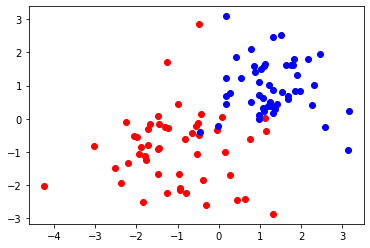

In [45]:
plt.scatter(x_class0[:, 0], x_class0[:, 1], c='red')
plt.scatter(x_class1[:, 0], x_class1[:, 1], c='blue')

#### Задание.
Постройте нейронную сеть – линейный классификатор и обучите её распознавать приведенный набор данных.  
*Подсказка*: в качестве функции потерь можно использовать Binary Cross Entropy ([BCELOSS](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).

In [6]:
def get_data():
    n_samples = 100
    half = int(n_samples / 2)

    x_class0 = np.random.normal(size=[half, 2]) + [-1, -1]
    y_class0 = np.zeros((half, 1))    
    
    x_class1 = np.random.normal(size=[half, 2]) + [1, 1]
    y_class1 = np.ones((half, 1))    
    
    data = np.vstack([x_class0, x_class1])
    targets = np.vstack([y_class0, y_class1])
    
    data = data.astype(np.float32)
    targets = targets.astype(np.float32)
    
    return data, targets

In [7]:
from sklearn.model_selection import train_test_split
data, targets = get_data()

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=17)

In [8]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.regr = nn.Linear(2, 1)

    def forward(self, x):
        predictions = self.regr(x)
        return torch.sigmoid(predictions)
    

In [10]:
model = NeuralNetwork()
model

NeuralNetwork(
  (regr): Linear(in_features=2, out_features=1, bias=True)
)

In [43]:
def new_train_loop(data, targets, Model, Binary_cross_entropy, optimizer):  
        optimizer.zero_grad()    
        pred = Model(data)                 
        loss = Binary_cross_entropy(pred, targets)                     
        loss.backward()
        optimizer.step()    

In [50]:
from sklearn.metrics import roc_auc_score
epoch = 1000
Model = NeuralNetwork()  
optimizer = torch.optim.SGD(Model.parameters(), lr=0.01)
Binary_cross_entropy = nn.BCELoss()
acc = []

for ep in range(epoch):
    new_train_loop(X_train, y_train, Model, Binary_cross_entropy, optimizer)
    
    fullLoss = Binary_cross_entropy(Model(X_train), y_train)    
    
    acc.append(roc_auc_score(y_test, Model(X_test).detach().numpy()))
    print(f'Эпоха: {ep}, Loss {fullLoss}')
    


Эпоха: 0, Loss 0.7176764011383057
Эпоха: 1, Loss 0.7121573686599731
Эпоха: 2, Loss 0.706716775894165
Эпоха: 3, Loss 0.7013532519340515
Эпоха: 4, Loss 0.6960660219192505
Эпоха: 5, Loss 0.6908535957336426
Эпоха: 6, Loss 0.6857153177261353
Эпоха: 7, Loss 0.6806497573852539
Эпоха: 8, Loss 0.6756559610366821
Эпоха: 9, Loss 0.6707329154014587
Эпоха: 10, Loss 0.665879487991333
Эпоха: 11, Loss 0.6610946655273438
Эпоха: 12, Loss 0.6563774943351746
Эпоха: 13, Loss 0.6517267823219299
Эпоха: 14, Loss 0.6471416354179382
Эпоха: 15, Loss 0.6426209807395935
Эпоха: 16, Loss 0.6381637454032898
Эпоха: 17, Loss 0.6337690949440002
Эпоха: 18, Loss 0.6294360160827637
Эпоха: 19, Loss 0.6251634955406189
Эпоха: 20, Loss 0.6209505796432495
Эпоха: 21, Loss 0.6167963147163391
Эпоха: 22, Loss 0.6126998066902161
Эпоха: 23, Loss 0.6086600422859192
Эпоха: 24, Loss 0.6046762466430664
Эпоха: 25, Loss 0.6007475852966309
Эпоха: 26, Loss 0.596872866153717
Эпоха: 27, Loss 0.5930514931678772
Эпоха: 28, Loss 0.589282512664794

Эпоха: 270, Loss 0.27536410093307495
Эпоха: 271, Loss 0.2749474346637726
Эпоха: 272, Loss 0.27453312277793884
Эпоха: 273, Loss 0.2741212248802185
Эпоха: 274, Loss 0.273711621761322
Эпоха: 275, Loss 0.2733043432235718
Эпоха: 276, Loss 0.27289941906929016
Эпоха: 277, Loss 0.27249670028686523
Эпоха: 278, Loss 0.2720962464809418
Эпоха: 279, Loss 0.2716980576515198
Эпоха: 280, Loss 0.27130207419395447
Эпоха: 281, Loss 0.27090829610824585
Эпоха: 282, Loss 0.27051669359207153
Эпоха: 283, Loss 0.2701272666454315
Эпоха: 284, Loss 0.2697400152683258
Эпоха: 285, Loss 0.2693548798561096
Эпоха: 286, Loss 0.26897186040878296
Эпоха: 287, Loss 0.26859092712402344
Эпоха: 288, Loss 0.26821205019950867
Эпоха: 289, Loss 0.26783522963523865
Эпоха: 290, Loss 0.26746049523353577
Эпоха: 291, Loss 0.26708778738975525
Эпоха: 292, Loss 0.2667170763015747
Эпоха: 293, Loss 0.26634836196899414
Эпоха: 294, Loss 0.26598161458969116
Эпоха: 295, Loss 0.26561683416366577
Эпоха: 296, Loss 0.2652539908885956
Эпоха: 297, L

Эпоха: 548, Loss 0.2105434089899063
Эпоха: 549, Loss 0.21041256189346313
Эпоха: 550, Loss 0.210282102227211
Эпоха: 551, Loss 0.2101520597934723
Эпоха: 552, Loss 0.21002238988876343
Эпоха: 553, Loss 0.2098931521177292
Эпоха: 554, Loss 0.20976431667804718
Эпоха: 555, Loss 0.20963583886623383
Эпоха: 556, Loss 0.2095077782869339
Эпоха: 557, Loss 0.20938009023666382
Эпоха: 558, Loss 0.20925281941890717
Эпоха: 559, Loss 0.20912592113018036
Эпоха: 560, Loss 0.2089993953704834
Эпоха: 561, Loss 0.20887328684329987
Эпоха: 562, Loss 0.2087475210428238
Эпоха: 563, Loss 0.20862217247486115
Эпоха: 564, Loss 0.20849716663360596
Эпоха: 565, Loss 0.20837253332138062
Эпоха: 566, Loss 0.2082483023405075
Эпоха: 567, Loss 0.20812444388866425
Эпоха: 568, Loss 0.20800092816352844
Эпоха: 569, Loss 0.20787781476974487
Эпоха: 570, Loss 0.20775504410266876
Эпоха: 571, Loss 0.2076326459646225
Эпоха: 572, Loss 0.20751060545444489
Эпоха: 573, Loss 0.2073889523744583
Эпоха: 574, Loss 0.2072676420211792
Эпоха: 575, L

Эпоха: 818, Loss 0.18548321723937988
Эпоха: 819, Loss 0.18541720509529114
Эпоха: 820, Loss 0.18535131216049194
Эпоха: 821, Loss 0.1852855533361435
Эпоха: 822, Loss 0.18521994352340698
Эпоха: 823, Loss 0.1851544976234436
Эпоха: 824, Loss 0.1850891411304474
Эпоха: 825, Loss 0.1850239485502243
Эпоха: 826, Loss 0.18495886027812958
Эпоха: 827, Loss 0.1848939210176468
Эпоха: 828, Loss 0.18482914566993713
Эпоха: 829, Loss 0.18476445972919464
Эпоха: 830, Loss 0.18469993770122528
Эпоха: 831, Loss 0.18463556468486786
Эпоха: 832, Loss 0.1845712661743164
Эпоха: 833, Loss 0.18450713157653809
Эпоха: 834, Loss 0.1844431459903717
Эпоха: 835, Loss 0.18437929451465607
Эпоха: 836, Loss 0.1843155473470688
Эпоха: 837, Loss 0.18425194919109344
Эпоха: 838, Loss 0.18418845534324646
Эпоха: 839, Loss 0.1841251105070114
Эпоха: 840, Loss 0.18406188488006592
Эпоха: 841, Loss 0.18399879336357117
Эпоха: 842, Loss 0.18393583595752716
Эпоха: 843, Loss 0.1838729977607727
Эпоха: 844, Loss 0.183810293674469
Эпоха: 845, L

In [51]:

predictions = Model(X_test)    
roc_auc_score(y_test, predictions.detach().numpy())

0.9821428571428572

In [52]:
print_weights(Model)

regr.weight = tensor([[1.3813, 1.1955]])
regr.bias = tensor([0.1447])


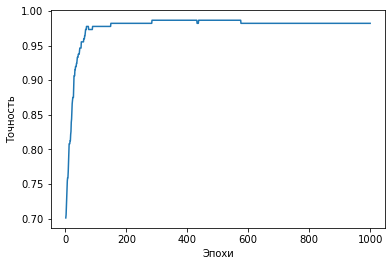

In [53]:
plt.plot(range(1, epoch+1), acc)
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.show()

#### Задание (факультативное).
Прочитать параграф 2.6 в учебнике С. Николенко и др. (стр. 81–92) и воспроизвести рассмотренные там нейронные сети на TensorFlow и Keras.